In [3]:
import os
import sys
import re

from PIL import Image

import numpy as np
import pandas as pd

import math
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from CSE6240_utilities import plot_confusion_matrix
import matplotlib.pylab as pylab

In [3]:
def imshow_gray (im):
    plt.imshow (im, interpolation = 'nearest', cmap = plt.get_cmap ('gray'))

## Read the preprocessed data

In [4]:
images = pd.read_csv("full_data.csv", header = None).values

## Implement SVD

In [5]:
# demean
images = images - np.mean( images, axis = 0 )
print images.shape

(6000, 10000)


X: (6000, 10000)
U: (6000, 6000)
Sigma: (6000,)


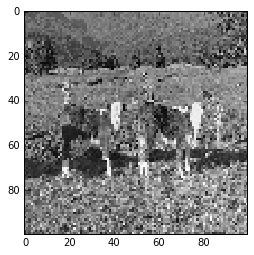

In [6]:
# To get back to an image, just reshape it again
imshow_gray (np.reshape (images[3, :], (min_rows, min_cols)))

# Compute the SVD of X
U ,Sigma, _ = np.linalg.svd(images, full_matrices = False)

# check on dimensions
print "X:", images.shape
print "U:", U.shape
print "Sigma:", Sigma.shape

Singular values:


,i,sigma_i,sigma_i^2,err_i^2,err_i,relerr_i
0,0,240284.953125,57736859648,2.045517e+11,452273.93750,0.653048
1,1,156544.296875,24506116096,1.800456e+11,424317.81250,0.612681
2,2,112161.890625,12580289536,1.674653e+11,409225.25000,0.590889
3,3,105421.773438,11113750528,1.563516e+11,395413.15625,0.570945
4,4,86489.960938,7480513536,1.488710e+11,385838.09375,0.557120
5,5,70521.226562,4973243392,1.438978e+11,379338.62500,0.547735
6,6,69023.945312,4764304896,1.391335e+11,373006.00000,0.538591
7,7,63246.207031,4000082688,1.351334e+11,367604.96875,0.530792
8,8,58370.765625,3407146240,1.317263e+11,362941.12500,0.524058
9,9,56754.792969,3221106432,1.285052e+11,358476.18750,0.517611


...


,i,sigma_i,sigma_i^2,err_i^2,err_i,relerr_i
5990,5990,2.824295e-12,7.976641e-24,0,0,0
5991,5991,2.248131e-12,5.054095e-24,0,0,0
5992,5992,2.197833e-12,4.830469e-24,0,0,0
5993,5993,1.971771e-12,3.887880e-24,0,0,0
5994,5994,1.791427e-12,3.209212e-24,0,0,0
5995,5995,1.471871e-12,2.166403e-24,0,0,0
5996,5996,1.121184e-12,1.257054e-24,0,0,0
5997,5997,8.826990e-13,7.791576e-25,0,0,0
5998,5998,8.793535e-13,7.732626e-25,0,0,0
5999,5999,6.594666e-13,4.348962e-25,0,0,0


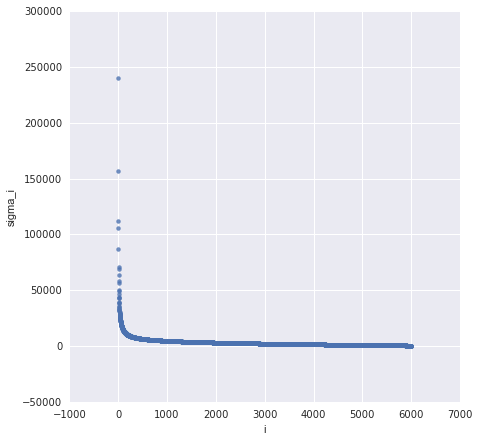

In [10]:
def peek_Sigma (Sigma, ret_df=False):
    k = len (Sigma)
    df_Sigma = pd.DataFrame (np.arange (len (Sigma)), columns=['i'])
    df_Sigma['sigma_i'] = Sigma
    Sigma_sq = np.power (Sigma, 2)
    Err_sq = np.sum (Sigma_sq) - np.cumsum (Sigma_sq)
    Err_sq[Err_sq < 0] = 0
    Err = np.sqrt (Err_sq)
    Relerr = Err / (Sigma[0] + Err[0])
    df_Sigma['sigma_i^2'] = Sigma_sq
    df_Sigma['err_i^2'] = Err_sq
    df_Sigma['err_i'] = Err
    df_Sigma['relerr_i'] = Relerr
    print "Singular values:"
    display (df_Sigma.head (10))
    print "..."
    display (df_Sigma.tail (10))
    
    f, ax = plt.subplots (figsize=(7, 7))
    #ax.set (yscale="log")
    sns.regplot ("i", "sigma_i", df_Sigma, ax=ax, fit_reg=False)
    if ret_df:
        return df_Sigma

peek_Sigma (Sigma)

In [11]:
k = 1000
X_reduced = U[:, 0:k].dot(np.diag(Sigma[0:k]))

In [12]:
X_reduced.shape

(6000, 1000)

In [13]:
np.savetxt("SVD-reduced_data.csv", X_reduced, delimiter = ",")
np.savetxt("SVD-U.csv", U, delimiter = ",")
np.savetxt("SVD-Sigma.csv", Sigma, delimiter = ",")

## Prediction using KNN

In [4]:
X = pd.read_csv("SVD-reduced_data.csv", header = None).values
y = pd.read_csv("label.csv", header = None).values.reshape(-1)

In [5]:
X.shape

(6000, 1000)

In [6]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [7]:
y_pred = clf.predict(X)

In [8]:
cm = confusion_matrix(y, y_pred)
print(cm)

[[604  25 283  24  51  13]
 [193 308 347  26 119   7]
 [ 91  20 852  14  16   7]
 [195  47 434 271  35  18]
 [154  46 354  51 389   6]
 [286  18 423  34  96 143]]


accuracy = 0.4278


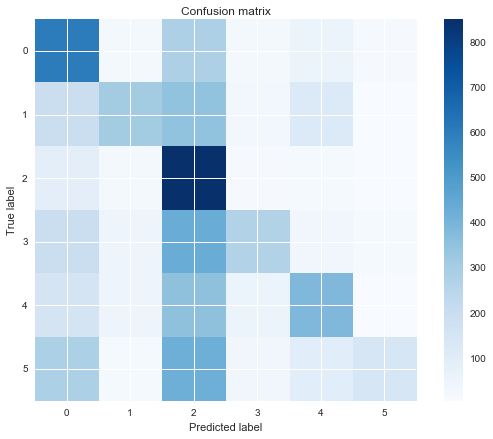

In [11]:
pylab.rcParams['figure.figsize'] = 8, 6

print "accuracy = %.4f" % (1.0 * np.sum(np.diag(cm)) / np.sum(np.sum(cm, axis = 0)))
plot_confusion_matrix(cm)

### KNN using Pearson Coef and Confusion Matrix

In [ ]:
def pearson(x, y):
     return 1.0 - pearsonr(x, y)[0] # higher pearson coef is better, opposite to distance

clf = KNeighborsClassifier(n_neighbors = 5, metric = pearson)
clf.fit(X, y)

y_pred = clf.predict(X)

cm = confusion_matrix(y, y_pred)
print(cm)

print "Autoencoder | pearson"
plot_confusion_matrix(cm)

### Conclusion